# Quality Assessment
Now it's your turn. Follow the steps on the platform and use what you've learnt to see how reliable the data is.

In [ ]:
import pandas as pd

Load our cleaned DataFrames

In [ ]:
# orders_cl.csv
url = "https://drive.google.com/file/d/1Tla62vfu__kCqvgypZyVt2S9VuC016yH/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders_cl = pd.read_csv(path)

# orderlines_cl.csv
url = "https://drive.google.com/file/d/1OhtkQS2fwOYdzfd-qPh7im35iLc-L9TA/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines_cl = pd.read_csv(path)

# products_cl.csv
url = "https://drive.google.com/file/d/1s7Lai4NSlsYjGEPg1QSOUJobNYVsZBOJ/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_cl = pd.read_csv(path)

## 1.&nbsp; Define Pandas display format

In [ ]:
# your code here
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
#details
import pandas as pd
pd.set_option('display.max_rows', 1000) # show up to 20 rows
pd.set_option('display.max_column', None) #show all columns
pd.set_option('display.float_format', '{:.2f}'.format) # show 2 decimal places

## 2.&nbsp; Exclude unwanted orders

In [ ]:
# your code here
unwanted_orders =[]


:## 3.&nbsp; Exclude orders with unknown products


        id  id_order  product_id  product_quantity      sku  unit_price  \
0  1119109    299539           0                 1  OTT0133       18.99   
1  1119110    299540           0                 1  LGE0043      399.00   
2  1119111    299541           0                 1  PAR0071      474.05   
3  1119112    299542           0                 1  WDT0315       68.39   
4  1119113    299543           0                 1  JBL0104       23.74   

                  date  
0  2017-01-01 00:07:19  
1  2017-01-01 00:19:45  
2  2017-01-01 00:20:57  
3  2017-01-01 00:51:40  
4  2017-01-01 01:06:38  


## 4.&nbsp; Explore the revenue from different tables

SyntaxError: unterminated string literal (detected at line 1) (ipython-input-3477061596.py, line 1)

#### Step 1:
Create the `unit_price_total` as `orderlines.unit_price` * `orderlines.product_quantity`

In [ ]:
# your code here
# Create unit_price_total column
orderlines_cl['unit_price_total'] = orderlines_cl['unit_price'] * orderlines_cl['product_quantity']

# Display first few rows to check
print(orderlines_cl.head())

        id  id_order  product_id  product_quantity      sku  unit_price  \
0  1119109    299539           0                 1  OTT0133       18.99   
1  1119110    299540           0                 1  LGE0043      399.00   
2  1119111    299541           0                 1  PAR0071      474.05   
3  1119112    299542           0                 1  WDT0315       68.39   
4  1119113    299543           0                 1  JBL0104       23.74   

                  date  unit_price_total  
0  2017-01-01 00:07:19             18.99  
1  2017-01-01 00:19:45            399.00  
2  2017-01-01 00:20:57            474.05  
3  2017-01-01 00:51:40             68.39  
4  2017-01-01 01:06:38             23.74  


#### Step 2:
Group by `id_order`, summarising by the sum of `unit_price_total`

In [ ]:
# your code here
# Group by id_order and sum the unit_price_total
order_sum = orderlines_cl.groupby('id_order', as_index=False)['unit_price_total'].sum()

# Rename the column for clarity
order_sum.rename(columns={'unit_price_total': 'order_total'}, inplace=True)

# Show the result
print(order_sum.head())


   id_order  order_total
0    241319        44.99
1    241355       135.98
2    241423       129.16
3    242832        10.77
4    243330        77.99


### What is the average difference between `total_paid` and `unit_price_total`?

In [ ]:
# your code here
# Step 1: Group orderlines by id_order to get total unit_price_total per order
order_sum = orderlines_cl.groupby('id_order', as_index=False)['unit_price_total'].sum()

# Step 2: Merge with orders_cl to get total_paid
merged = pd.merge(orders_cl, order_sum, left_on='order_id', right_on='id_order', how='inner')

# Step 3: Calculate the difference
merged['difference'] = merged['total_paid'] - merged['unit_price_total']

# Step 4: Find the average difference
average_difference = merged['difference'].mean()

print("💰 Average difference between total_paid and unit_price_total:", round(average_difference, 2))

💰 Average difference between total_paid and unit_price_total: 4.87


### What is the distribution of these differences?

,difference
count,166144.00
mean,4.87
std,303.81
min,-381.47
25%,0.00
50%,0.00
75%,3.99
max,90898.61


<Axes: >

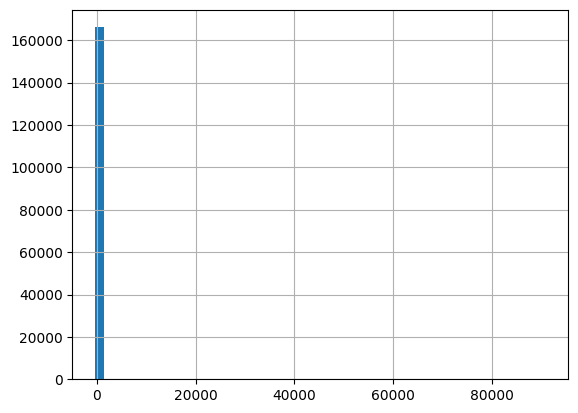

In [ ]:
# your code here
# Calculate the differences (as before)
order_total = orderlines_cl.groupby('id_order', as_index=False)['unit_price_total'].sum()
merged = orders_cl.merge(order_total, left_on='order_id', right_on='id_order')
merged['difference'] = merged['total_paid'] - merged['unit_price_total']

# Display the distribution of differences
display(merged['difference'].describe())

# You can also visualize the distribution using a histogram
merged['difference'].hist(bins=50)

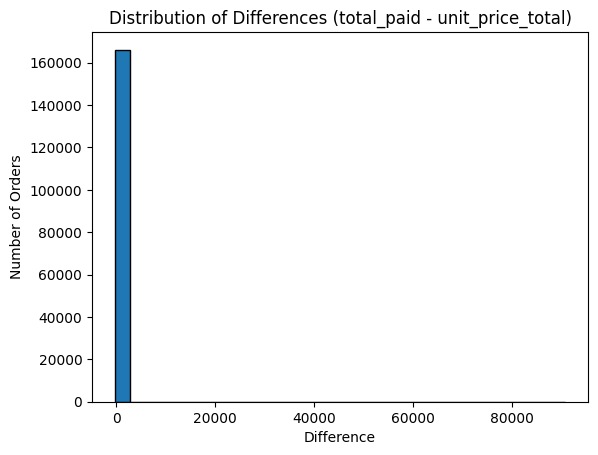

In [ ]:
# Plot the distribution
import matplotlib.pyplot as plt
plt.hist(merged['difference'], bins=30, edgecolor='black')
plt.title('Distribution of Differences (total_paid - unit_price_total)')
plt.xlabel('Difference')
plt.ylabel('Number of Orders')
plt.show()

### Can all the differences be explained by shipping costs? If not, what are other plausible explanations?

In [ ]:
import pandas as pd

# 1️⃣ Sum unit_price_total for each order
order_total = orderlines_cl.groupby('id_order', as_index=False)['unit_price_total'].sum()

In [ ]:
# 2️⃣ Merge with orders_cl to get total_paid and shipping_cost
merged = orders_cl.merge(order_total, left_on='order_id', right_on='id_order')

In [ ]:
# 3️⃣ Calculate the difference between total_paid and unit_price_total
merged['difference'] = merged['total_paid'] - merged['unit_price_total']

In [ ]:
# 4️⃣ Calculate difference minus shipping cost
merged['difference_minus_shipping'] = merged['difference'] - merged['shipping_cost']

KeyError: 'shipping_cost'

### Exploring other potential reasons for price differences

Other potential reasons for the differences between `total_paid` and `unit_price_total` could include:

*   **Discounts:** Were any discounts applied to the orders?
*   **Taxes:** Were there any sales taxes or other taxes added?
*   **Other Fees:** Were there any other fees (e.g., processing fees, handling fees) included in the total paid?

To investigate these possibilities, you would need to examine your datasets for columns that contain this information. If such columns exist, you could calculate the total value of these factors for each order and see if they account for the differences.

### If there are differences that you can’t explain: what should you do with these orders?

In [ ]:
# your code here

## 5.&nbsp; Become confident about your dataset

Let's hear your thoughts about what you discovered.

In [ ]:
# your thoughts & code here

Do not forget to download your quality controlled DataFrames

In [ ]:
from google.colab import files

#orders_quality_controlled.to_csv("orders_qu.csv", index=False)
#files.download("orders_qu.csv")

#orderlines_quality_controlled.to_csv("orderlines_qu.csv", index=False)
#files.download("orderlines_qu.csv")